# importing the libraries

# Loading the Data

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm,datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,\
ConfusionMatrixDisplay,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
sns.set()
# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time
import numpy as np

In [5]:
social_data=pd.read_csv("social.csv")
social_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
social_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
social_data["Age"] = social_data["Age"].astype(float)
social_data["Purchased"] = social_data["Purchased"].astype(int)
social_data["EstimatedSalary"] = social_data["EstimatedSalary"].astype(float)

In [8]:
data=social_data.copy()
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [9]:
data=social_data.drop(["User ID"],axis=1)

In [10]:
enc_i=LabelEncoder()
data["Gender"]=enc_i.fit_transform(data["Gender"])
data


,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0
...,...,...,...,...
395,0,46.0,41000.0,1
396,1,51.0,23000.0,1
397,0,50.0,20000.0,1
398,1,36.0,33000.0,0


# Defining Inputs and Outputs

In [102]:
target=data["Purchased"]
inputs=data.drop(["Purchased","Gender"],axis=1)

In [144]:
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int32

# Train_Test_Split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3,random_state=365,stratify=target)

In [146]:
y_train.value_counts(normalize=True)

0    0.642857
1    0.357143
Name: Purchased, dtype: float64

In [147]:
y_test.value_counts(normalize=True)

0    0.641667
1    0.358333
Name: Purchased, dtype: float64

# Encoding

# Scaling and Transforming


In [149]:
scaling=MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_transf=scaling.transform(x_train)

# Classification

In [151]:
C=1.0

In [152]:
svm=SVC(kernel="linear",C=C).fit(x_train_transf,y_train)

In [6]:
y_pred_test=svm.predict()


AttributeError: module 'sklearn.svm' has no attribute 'predict'

In [154]:
y_pred_test.sum()

36

# Confusion Matrix and Classfication Report

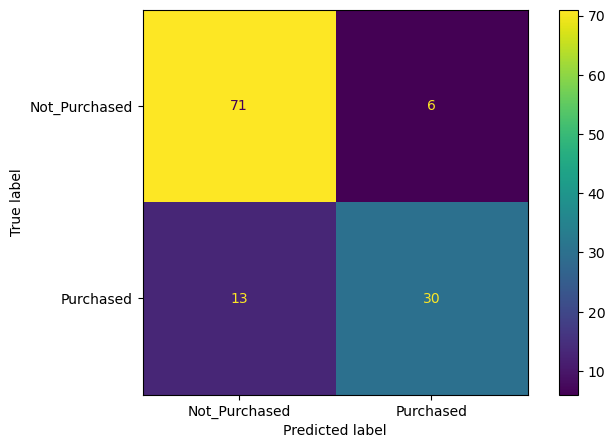

In [156]:
fig,ax = plt.subplots(figsize=(8, 5))
cmp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test),display_labels=["Not_Purchased","Purchased"])
cmp.plot(ax=ax)

In [157]:
print(classification_report(y_test,y_pred_test,target_names=["Not_Purchased","Purchased"]))

               precision    recall  f1-score   support

Not_Purchased       0.85      0.92      0.88        77
    Purchased       0.83      0.70      0.76        43

     accuracy                           0.84       120
    macro avg       0.84      0.81      0.82       120
 weighted avg       0.84      0.84      0.84       120



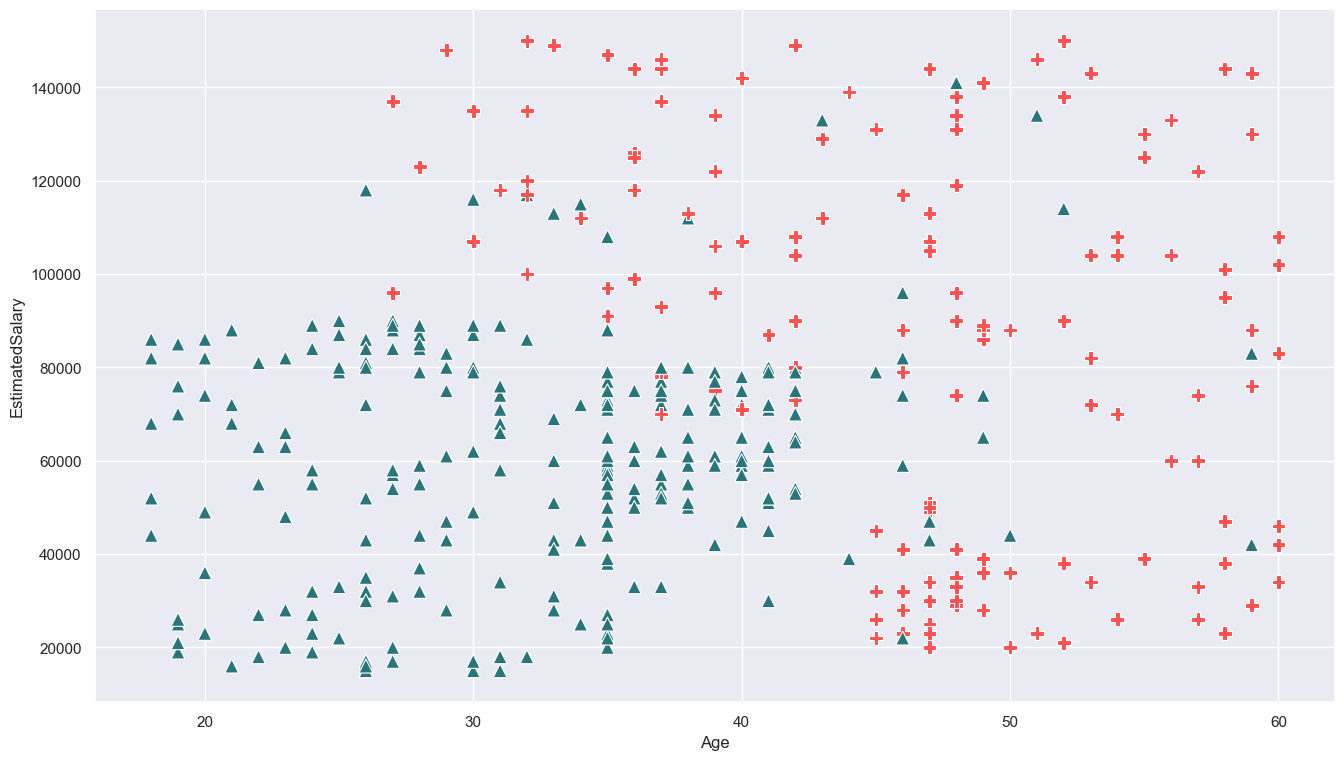

In [164]:
knn_palette = sns.color_palette([ '#29757A', '#FF5050'])
knn_palette
plt.figure(figsize = (16, 9))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', 
                data = data, 
                hue = 'Purchased', 
                palette = knn_palette,
                markers = ['^', 'P'],
                style = 'Purchased', 
                s = 100, 
                alpha = 1,
                legend = False);

# GRID Search CV, Best Params, Grid Score, Classfication Report

In [5]:
tuned_parameters=[{"kernel":["linear"],"C":[1,10]},
                 {"kernel":["poly"],"C":[1,10]},{"kernel":["rbf"],"gamma":[1e-3,1e-4],"C":[1,10]},{"kernel": ["sigmoid"], "C":[1,10] }]

In [4]:
scores = ["precision", "recall"]

In [197]:
y_train.to_numpy()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [214]:
svc_lin=svm.SVC(kernel='linear', C=10)
svc_lin.fit(x_train_transf, y_train)

SVC(C=10, kernel='linear')

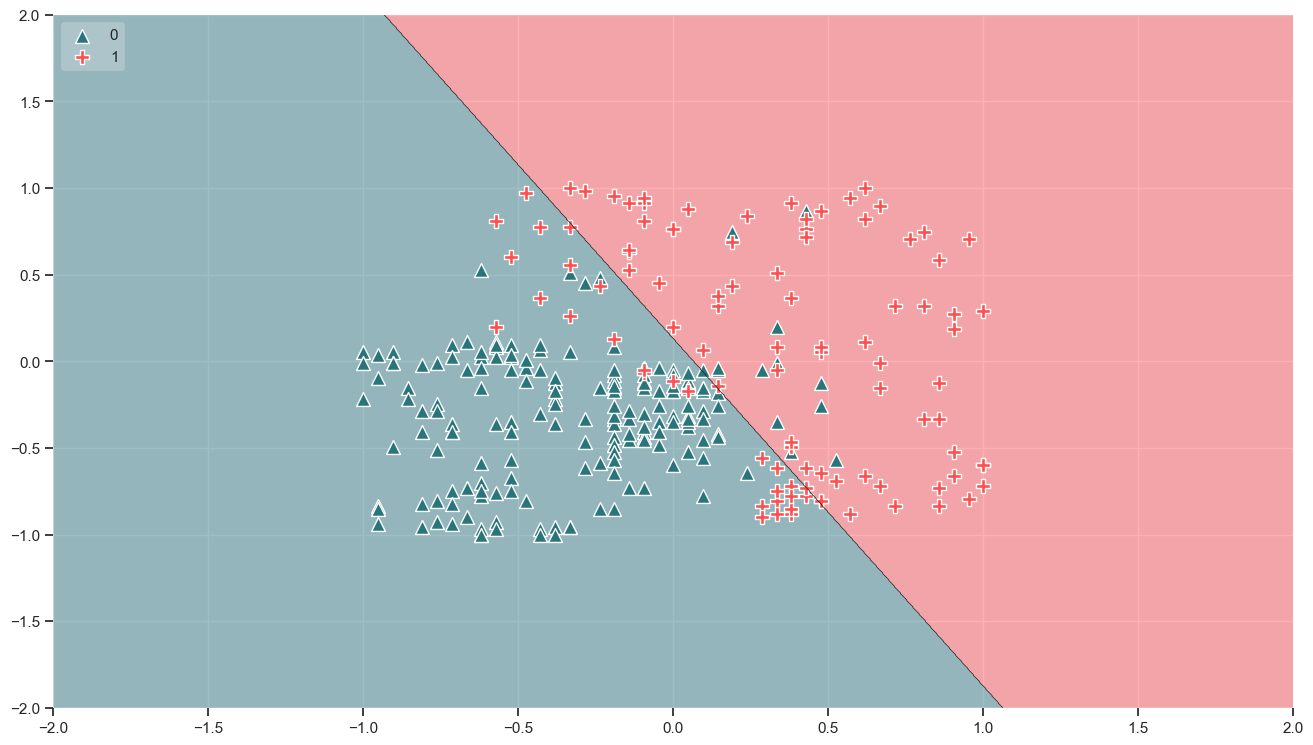

In [218]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_transf, y = y_train.to_numpy(),
                      clf = svc_lin,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

In [204]:
svc_poly = svm.SVC(kernel='poly', C=10)
svc_poly.fit(x_train_transf, y_train)

SVC(C=10, kernel='poly')

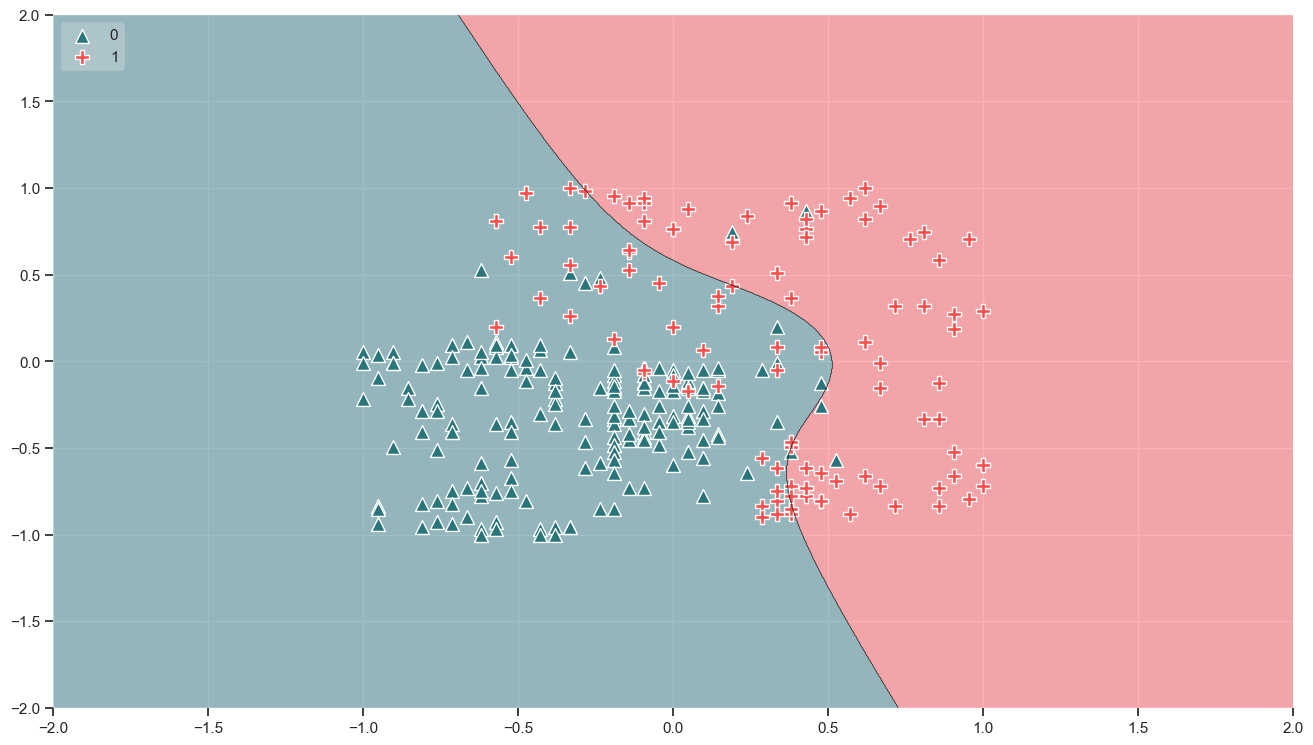

In [207]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_transf, y = y_train.to_numpy(),
                      clf = svc_poly,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

In [209]:
svc_sigmoid = svm.SVC(kernel='sigmoid', C=10)
svc_sigmoid.fit(x_train_transf, y_train)

SVC(C=10, kernel='sigmoid')

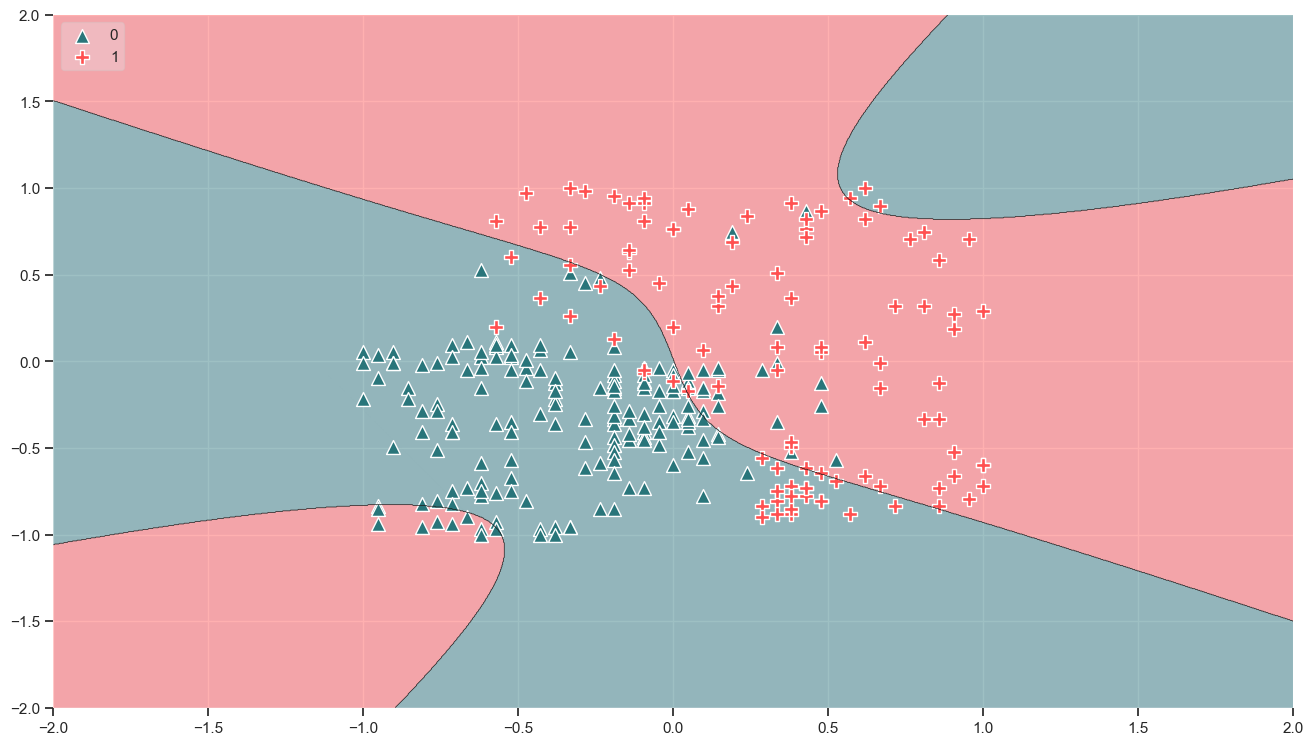

In [212]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_transf, y = y_train.to_numpy(),
                      clf = svc_sigmoid,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()

In [219]:
svc_radial = SVC(kernel='rbf', C=10)
svc_radial.fit(x_train_transf, y_train)

SVC(C=10)

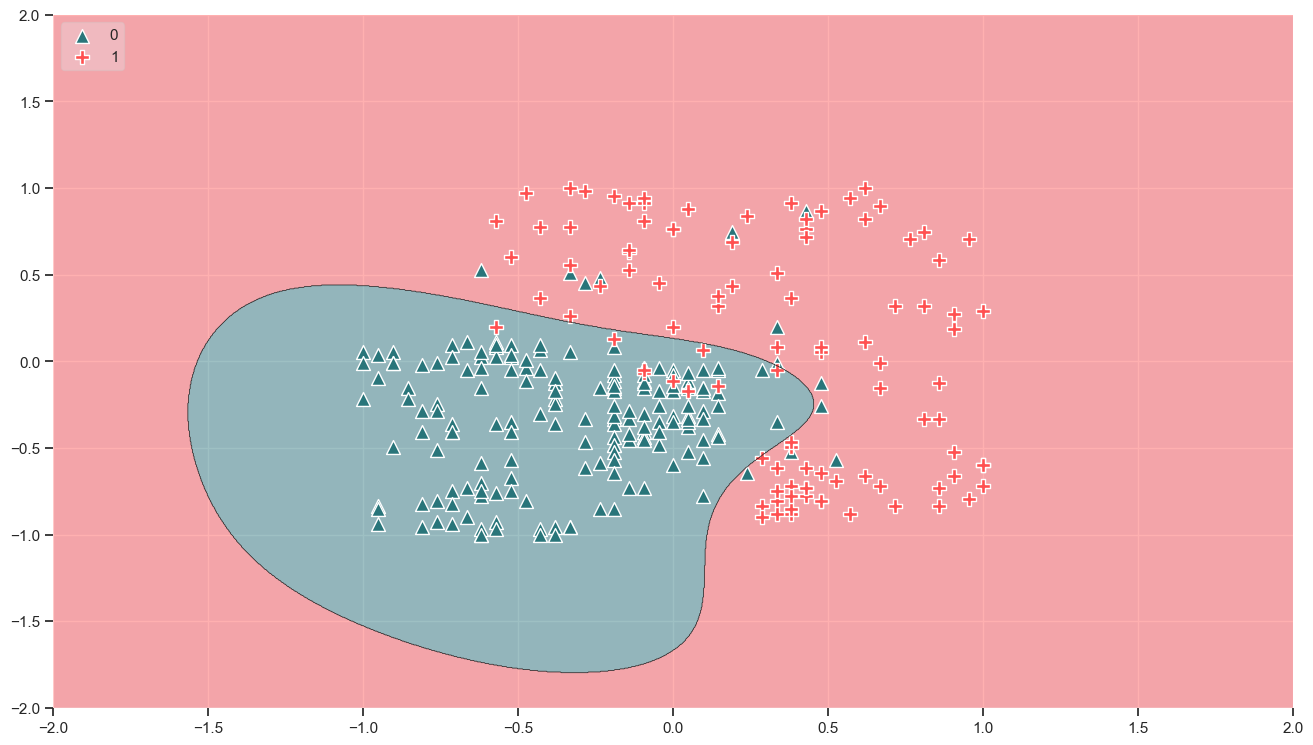

In [220]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_transf, y = y_train.to_numpy(),
                      clf = svc_radial,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()